In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [8]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [9]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


<Axes: >

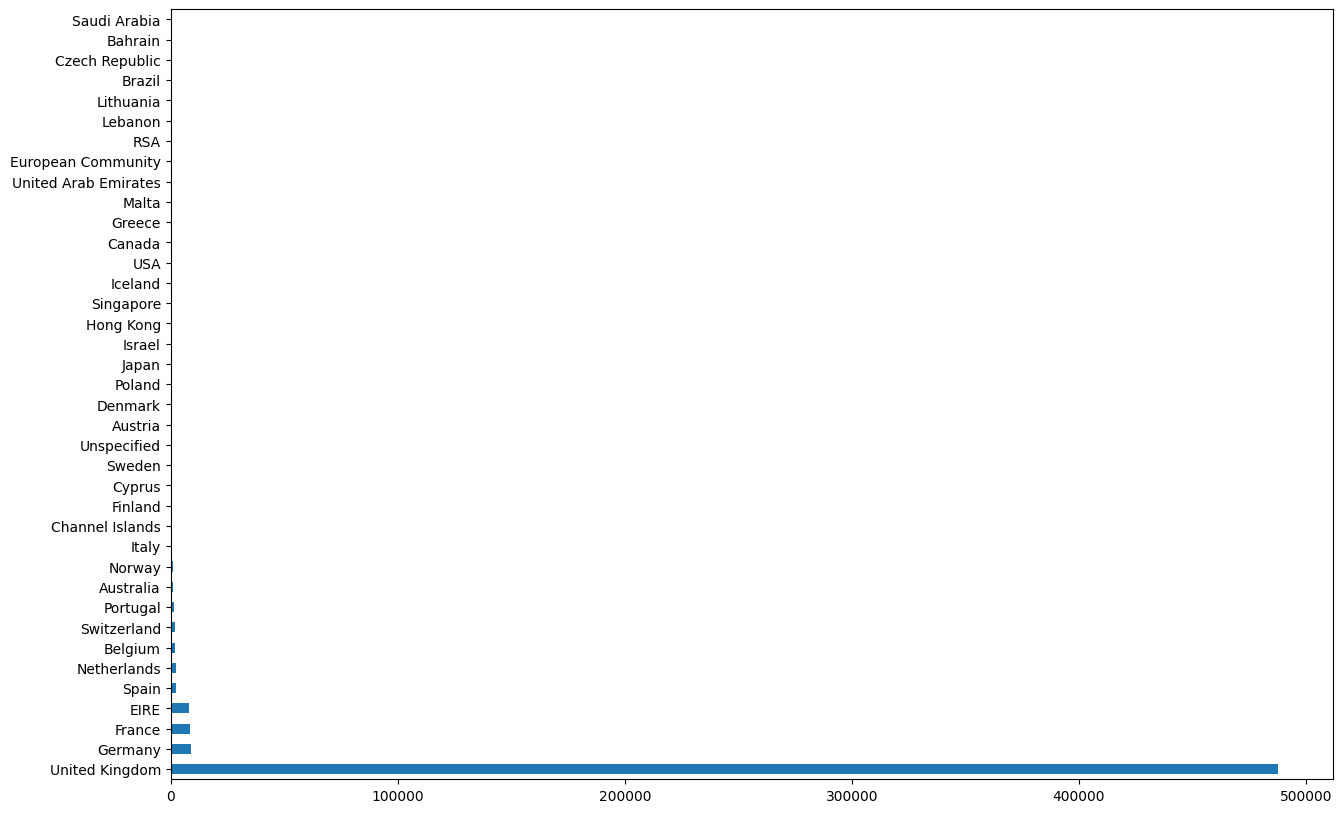

In [10]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [11]:
basket = df[df['Country'] == "Germany"].groupby(['InvoiceNo','Description'])['Quantity']

In [12]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [13]:
basket.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [15]:
basket = basket.applymap(encode_data)

In [16]:
basket.drop('POSTAGE', inplace=True, axis=1)

In [17]:
itemsets = apriori(basket.astype('bool'), min_support=0.05, use_colnames=True)

In [18]:
itemsets.head(10)

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [19]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [20]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [21]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'],' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

PLASTERS IN TIN CIRCUS PARADE  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 ,  0.5849056603773585 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 ,  0.5714285714285714 ]
PLASTERS IN TIN WOODLAND ANIMALS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 ,  0.5396825396825397 ]
RED RETROSPOT CHARLOTTE BAG  ==>  WOODLAND CHARLOTTE BAG [ 0.05908096280087528 ,  0.8437500000000001 ]
ROUND SNACK BOXES SET OF 4 FRUITS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 ,  0.8333333333333333 ]
ROUND SNACK BOXES SET OF4 WOODLAND  ==>  ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 ,  0.5357142857142857 ]
SPACEBOY LUNCH BOX  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 ,  0.6808510638297872 ]
WOODLAND CHARLOTTE BAG  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 ,  0.5 ]


In [22]:
support = rules['support'].values
confidence = rules['confidence'].values

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

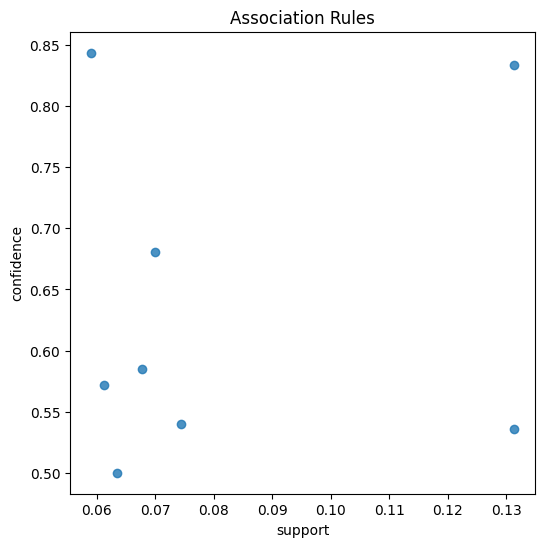

In [23]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [24]:
from mlxtend.frequent_patterns import fpgrowth

itemsets = fpgrowth(basket.astype('bool'), min_support=0.05, use_colnames=True)

In [25]:
itemsets.head(10)

,support,itemsets
0,0.100656,(JUMBO BAG WOODLAND ANIMALS)
1,0.102845,(6 RIBBONS RUSTIC CHARM)
2,0.091904,(JAM MAKING SET PRINTED)
3,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
4,0.063457,(JAM JAR WITH PINK LID)
5,0.078775,(JUMBO BAG RED RETROSPOT)
6,0.067834,(WOODLAND PARTY BAG + STICKER SET)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.054705,(MEMO BOARD COTTAGE DESIGN)
9,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)


In [26]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [27]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   leverage            8 non-null      float64
 8   conviction          8 non-null      float64
 9   zhangs_metric       8 non-null      float64
dtypes: float64(8), object(2)
memory usage: 772.0+ bytes


In [28]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
2,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND),0.126915,0.245077,0.063457,0.500000,2.040179,0.032354,1.509847,0.583960
3,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984,0.864580
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427,0.713415
5,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746,0.913551
6,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006,0.633174
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670,0.849877


In [29]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [30]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'],' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ROUND SNACK BOXES SET OF 4 FRUITS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.13129102844638948 ,  0.8333333333333333 ]
ROUND SNACK BOXES SET OF4 WOODLAND  ==>  ROUND SNACK BOXES SET OF 4 FRUITS [ 0.13129102844638948 ,  0.5357142857142857 ]
WOODLAND CHARLOTTE BAG  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.06345733041575492 ,  0.5 ]
PLASTERS IN TIN CIRCUS PARADE  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.06783369803063458 ,  0.5849056603773585 ]
SPACEBOY LUNCH BOX  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.0700218818380744 ,  0.6808510638297872 ]
RED RETROSPOT CHARLOTTE BAG  ==>  WOODLAND CHARLOTTE BAG [ 0.05908096280087528 ,  0.8437500000000001 ]
PLASTERS IN TIN WOODLAND ANIMALS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ 0.07439824945295405 ,  0.5396825396825397 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ 0.061269146608315096 ,  0.5714285714285714 ]


In [31]:
support = rules['support'].values
confidence = rules['confidence'].values

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

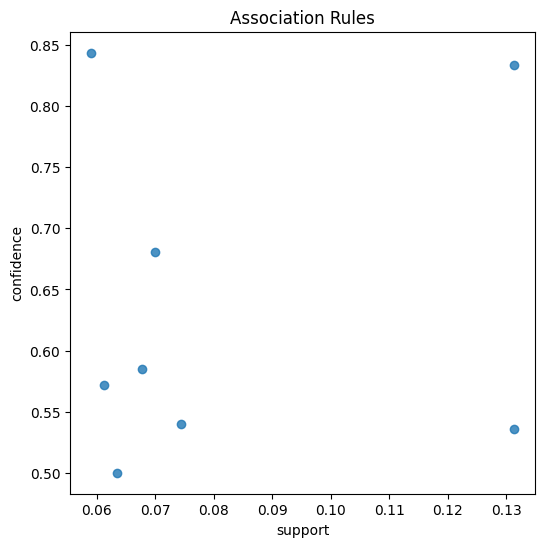

In [32]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)